In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("trajectory_pp_600_v2.csv")

# Parse timestamp
df["ts"] = pd.to_datetime(df["ts"])

print("Dataset shape:", df.shape)
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nTime monotonicity check:")
print((df["ts"].diff().dropna() > pd.Timedelta(0)).all())

print("\nBasic statistics:")
print(df.describe())


Dataset shape: (3600, 15)

Missing values per column:
ts                          0
rf_frequency_setpoint_hz    0
rf_power_setpoint_dbm       0
rf_output_state             0
pa_supply_current_a         0
pa_temperature_c            0
measured_rf_output_dbm      0
freq_error_internal_hz      0
freq_error_external_hz      0
aclr_db                     0
rms_evm_percent             0
aging_factor                0
data_source                 0
stress_mode                 0
ftc_active                  0
dtype: int64

Time monotonicity check:
True

Basic statistics:
                                  ts  rf_frequency_setpoint_hz  \
count                           3600              3.600000e+03   
mean   2025-12-24 14:13:31.978808064              3.000000e+09   
min       2025-12-24 13:43:32.478808              3.000000e+09   
25%    2025-12-24 13:58:32.228808192              3.000000e+09   
50%    2025-12-24 14:13:31.978808064              3.000000e+09   
75%    2025-12-24 14:28:31.728807936 

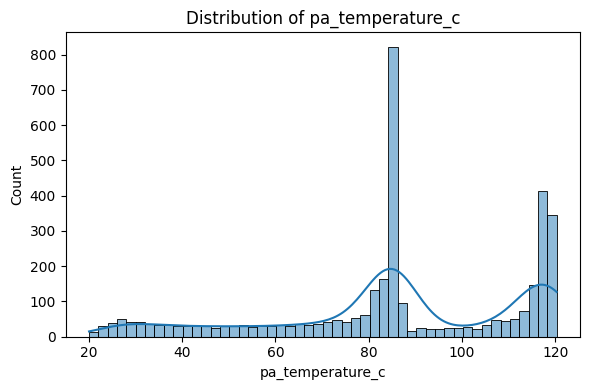

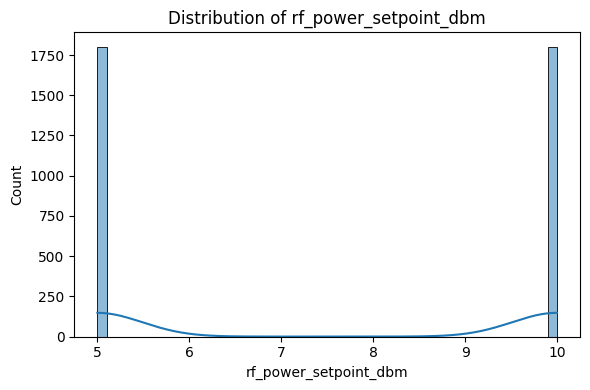

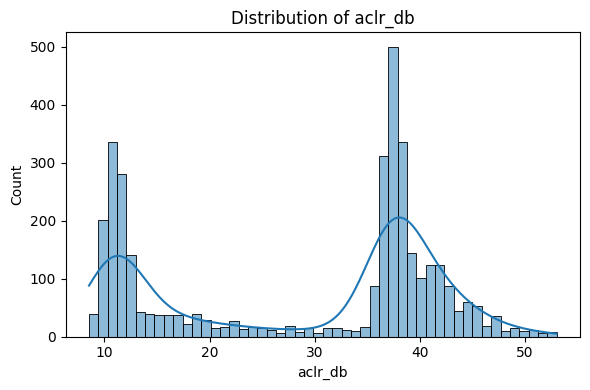

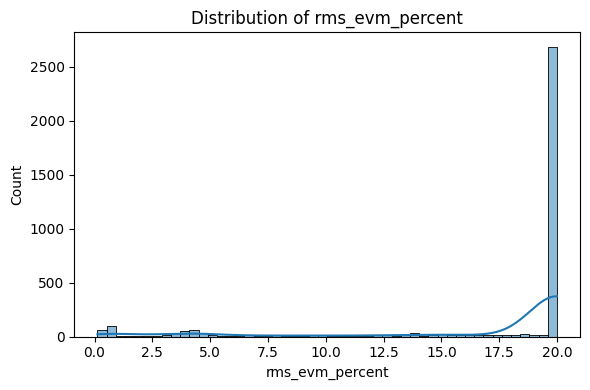

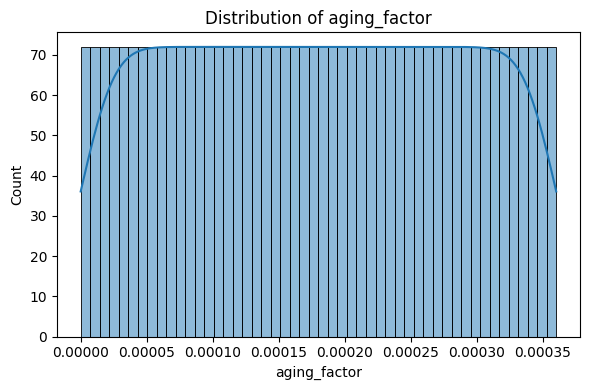

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    "pa_temperature_c",
    "rf_power_setpoint_dbm",
    "aclr_db",
    "rms_evm_percent",
    "aging_factor"
]

for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


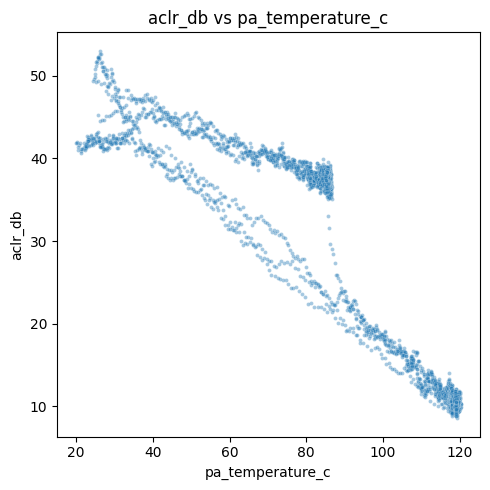

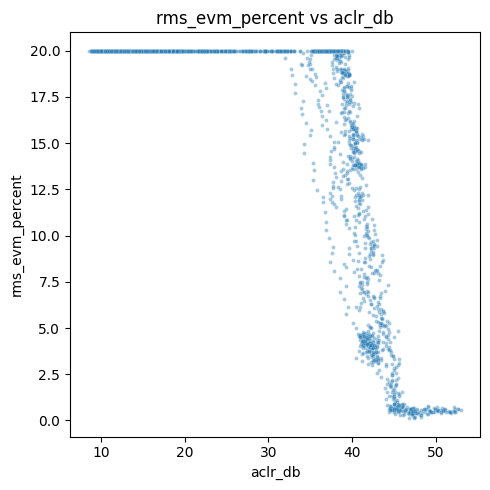

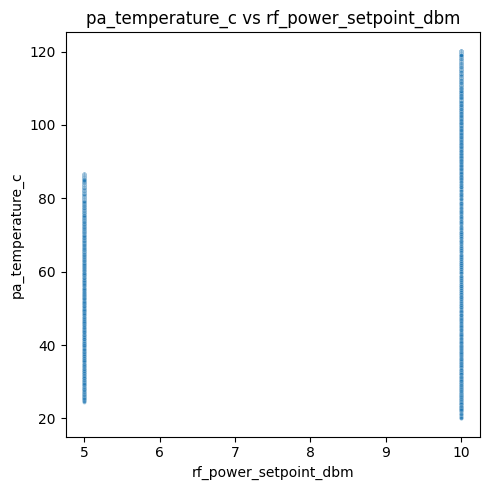

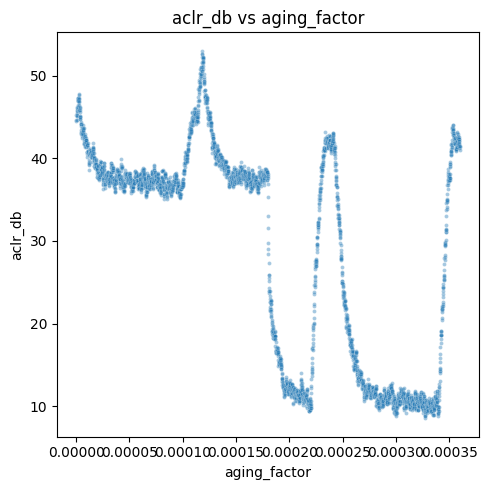

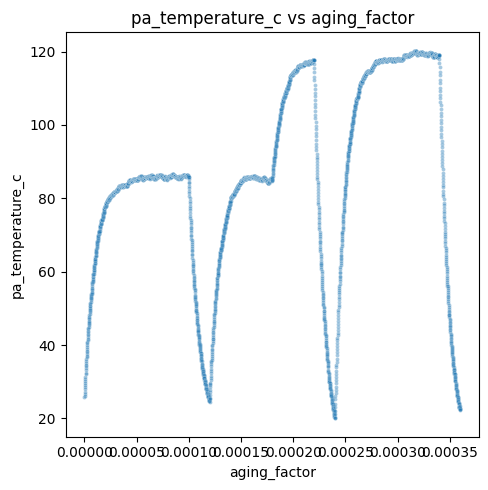

In [3]:
pairwise_plots = [
    ("pa_temperature_c", "aclr_db"),
    ("aclr_db", "rms_evm_percent"),
    ("rf_power_setpoint_dbm", "pa_temperature_c"),
    ("aging_factor", "aclr_db"),
    ("aging_factor", "pa_temperature_c")
]

for x, y in pairwise_plots:
    plt.figure(figsize=(5, 5))
    sns.scatterplot(x=df[x], y=df[y], s=8, alpha=0.4)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{y} vs {x}")
    plt.tight_layout()
    plt.show()


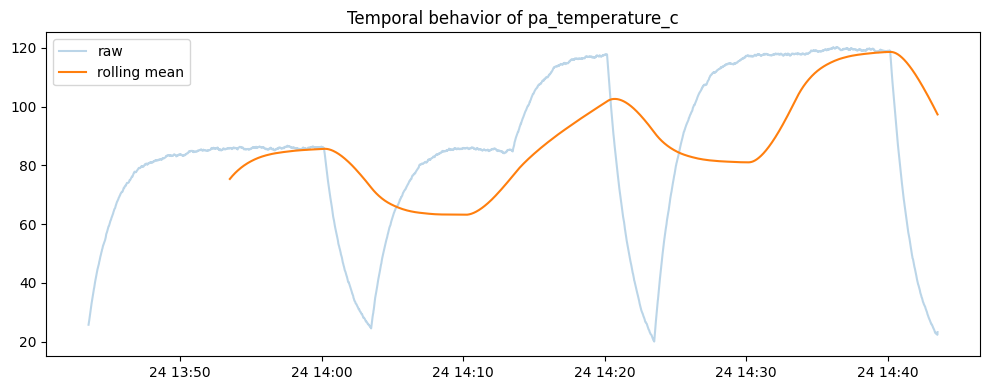

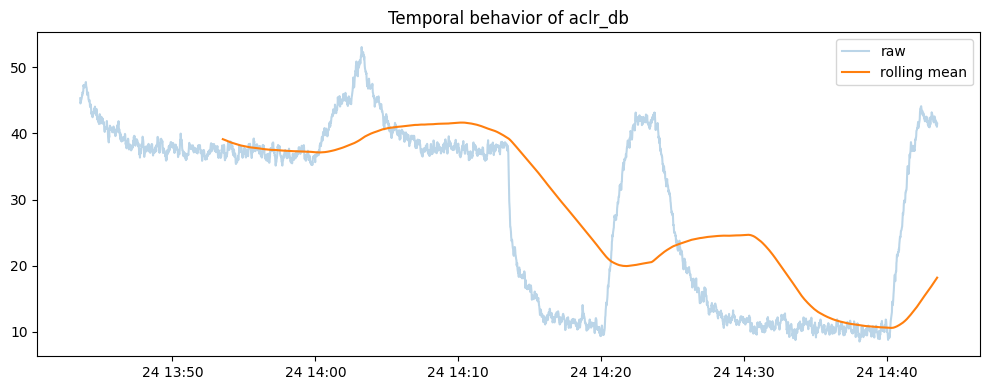

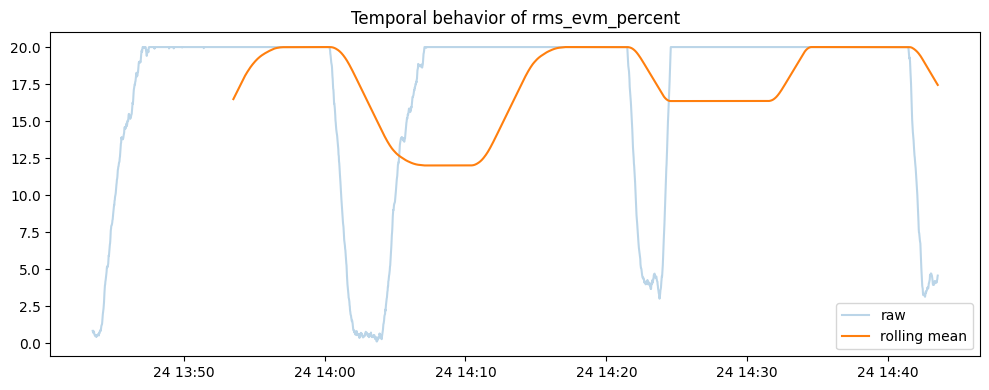

In [4]:
WINDOW = 600  # same as preprocessing window

signals = [
    "pa_temperature_c",
    "aclr_db",
    "rms_evm_percent"
]

for col in signals:
    df[f"{col}_roll_mean"] = df[col].rolling(WINDOW).mean()
    df[f"{col}_roll_slope"] = df[f"{col}_roll_mean"].diff()
    df[f"{col}_roll_var"] = df[col].rolling(WINDOW).var()

    plt.figure(figsize=(10, 4))
    plt.plot(df["ts"], df[col], alpha=0.3, label="raw")
    plt.plot(df["ts"], df[f"{col}_roll_mean"], label="rolling mean")
    plt.title(f"Temporal behavior of {col}")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [6]:
candidate_features = [
    "pa_temperature_c",
    "aclr_db",
    "rms_evm_percent",
    "aging_factor",
    "pa_temperature_c_roll_mean",
    "aclr_db_roll_slope",
    "rms_evm_percent_roll_var"
]

for col in candidate_features:
    print(f"\nFeature: {col}")
    print("Std:", df[col].std())
    print("Min / Max:", df[col].min(), df[col].max())



Feature: pa_temperature_c
Std: 27.09036158812072
Min / Max: 20.078982286477043 120.247075476454

Feature: aclr_db
Std: 13.214345112604295
Min / Max: 8.533096968833656 53.0397523246061

Feature: rms_evm_percent
Std: 5.968437969981177
Min / Max: 0.1222030868036732 20.0

Feature: aging_factor
Std: 0.00010393748120865729
Min / Max: 1e-07 0.00036

Feature: pa_temperature_c_roll_mean
Std: 20.81814755145157
Min / Max: 45.49178046406791 119.33666810256346

Feature: aclr_db_roll_slope
Std: 0.047581015731006045
Min / Max: -0.10531971179285193 0.1145568287547718

Feature: rms_evm_percent_roll_var
Std: 21.993946752237836
Min / Max: 0.0 75.0755476623208
